In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("clean_data.csv")
df

,Unnamed: 0,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country
0,0,0.020,73.7125,87931.0,13.0,26998.0,5.479006e+10,0.035,60.0,336.0,...,0.0,1.0,0.342,0.619,0.039,31719449.0,0.599,1.020000e+08,1.930000e+08,Algeria
1,1,0.050,52.1000,9542.0,13.0,7499.0,9.129595e+09,0.034,22.0,336.0,...,0.0,1.0,0.476,0.499,0.025,13924930.0,0.324,3.400000e+07,1.460000e+08,Angola
2,2,0.043,71.0875,1617.0,40.0,1983.0,2.359122e+09,0.043,15.0,52.0,...,0.0,1.0,0.454,0.517,0.029,6949366.0,0.383,7.700000e+07,5.000000e+07,Benin
3,3,0.027,18.7250,4276.0,40.0,1836.0,5.788312e+09,0.047,152.0,52.0,...,0.1,1.0,0.383,0.587,0.029,1755375.0,0.532,2.270000e+08,2.090000e+08,Botswana
4,4,0.046,45.4875,1041.0,84.0,765.0,2.610959e+09,0.051,12.0,216.0,...,0.0,1.0,0.468,0.505,0.028,11607944.0,0.178,2.300000e+07,3.000000e+07,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,2699,0.013,0.0000,161.0,40.0,76.0,2.671401e+09,0.033,2718.0,52.0,...,0.4,1.0,0.292,0.637,0.071,32427.0,0.911,4.890000e+08,1.400000e+08,Turks and Caicos Islands
2700,2700,0.013,46.4000,91118.0,5.0,2132446.0,1.624460e+13,0.179,8895.0,175.0,...,1.0,1.0,0.196,0.667,0.136,313873685.0,0.811,2.000920e+11,1.265730e+11,United States
2701,2701,0.015,41.9000,737.0,7.0,19986.0,5.000435e+10,0.089,1308.0,310.0,...,1.5,1.0,0.220,0.639,0.140,3395253.0,0.948,2.222000e+09,1.028000e+09,Uruguay
2702,2702,0.020,61.9000,91118.0,144.0,27086.0,3.812862e+11,0.046,593.0,792.0,...,1.0,1.0,0.288,0.652,0.060,29954782.0,0.889,9.040000e+08,3.202000e+09,"Venezuela, RB"


In [3]:
df = df.drop(['Number of Records'], axis=1)

In [4]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
df_norm = norm_func(df.iloc[:,:22])
df_norm

,Unnamed: 0,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound
0,0.00000,0.282609,0.217377,0.010610,0.017316,0.009895,0.003369,0.124424,0.005855,0.125193,...,0.019153,0.666667,0.588235,0.000000,0.586387,0.377604,0.149378,0.023470,0.563181,0.000506
1,0.00037,0.934783,0.153642,0.001151,0.017316,0.002746,0.000558,0.119816,0.002019,0.125193,...,0.207056,0.166667,0.137255,0.000000,0.937173,0.065104,0.091286,0.010296,0.263617,0.000166
2,0.00074,0.782609,0.209636,0.000194,0.056277,0.000724,0.000141,0.161290,0.001312,0.015456,...,0.010887,0.375000,0.313725,0.000000,0.879581,0.111979,0.107884,0.005131,0.327887,0.000381
3,0.00111,0.434783,0.055220,0.000515,0.056277,0.000670,0.000352,0.179724,0.015142,0.015456,...,0.030242,0.270833,0.235294,0.034483,0.693717,0.294271,0.107884,0.001286,0.490196,0.001131
4,0.00148,0.847826,0.134142,0.000125,0.119769,0.000278,0.000157,0.198157,0.001009,0.078825,...,0.010887,0.270833,0.235294,0.000000,0.916230,0.080729,0.103734,0.008580,0.104575,0.000111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.99852,0.130435,0.000000,0.000019,0.056277,0.000025,0.000161,0.115207,0.274177,0.015456,...,0.010887,0.854167,0.725490,0.137931,0.455497,0.424479,0.282158,0.000010,0.903050,0.002440
2700,0.99889,0.130435,0.136833,0.010995,0.005772,0.781766,1.000000,0.788018,0.897739,0.062983,...,0.005645,0.875000,0.764706,0.344828,0.204188,0.502604,0.551867,0.232369,0.794118,1.000000
2701,0.99926,0.173913,0.123562,0.000088,0.008658,0.007324,0.003074,0.373272,0.131839,0.115147,...,0.021573,0.854167,0.725490,0.517241,0.267016,0.429688,0.568465,0.002500,0.943355,0.011101
2702,0.99963,0.282609,0.182542,0.010995,0.206349,0.009927,0.023468,0.175115,0.059661,0.301391,...,0.032056,0.812500,0.686275,0.344828,0.445026,0.463542,0.236515,0.022164,0.879085,0.004514


In [6]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=12)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)

In [7]:
wcss

[1855.0533299610308,
 1081.5036610876832,
 889.87993211396,
 795.3653083565877,
 726.5277116027802,
 671.4194116810489,
 638.1924348320285,
 609.9887902651144,
 583.6063418053012,
 550.0333345035053]

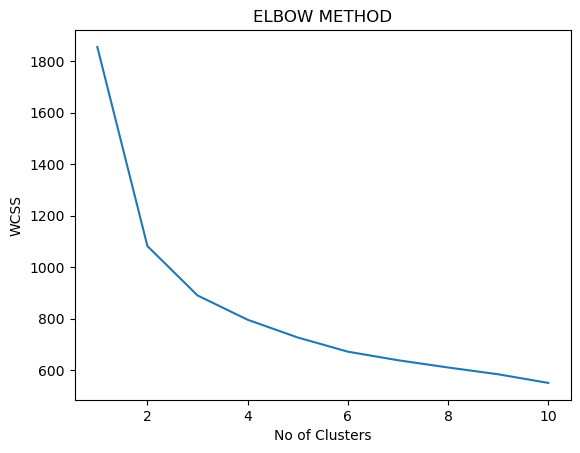

In [8]:
plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(n_clusters=3, random_state=12)
clusters_new.fit(df_norm)

KMeans(n_clusters=3, random_state=12)

In [10]:
clusters_new.labels_

array([2, 0, 0, ..., 1, 1, 1])

In [11]:
#Assign clusters to the data set
df['clusterid_new'] = clusters_new.labels_

In [12]:
df

,Unnamed: 0,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country,clusterid_new
0,0,0.020,73.7125,87931.0,13.0,26998.0,5.479006e+10,0.035,60.0,336.0,...,0.0,0.342,0.619,0.039,31719449.0,0.599,1.020000e+08,1.930000e+08,Algeria,2
1,1,0.050,52.1000,9542.0,13.0,7499.0,9.129595e+09,0.034,22.0,336.0,...,0.0,0.476,0.499,0.025,13924930.0,0.324,3.400000e+07,1.460000e+08,Angola,0
2,2,0.043,71.0875,1617.0,40.0,1983.0,2.359122e+09,0.043,15.0,52.0,...,0.0,0.454,0.517,0.029,6949366.0,0.383,7.700000e+07,5.000000e+07,Benin,0
3,3,0.027,18.7250,4276.0,40.0,1836.0,5.788312e+09,0.047,152.0,52.0,...,0.1,0.383,0.587,0.029,1755375.0,0.532,2.270000e+08,2.090000e+08,Botswana,0
4,4,0.046,45.4875,1041.0,84.0,765.0,2.610959e+09,0.051,12.0,216.0,...,0.0,0.468,0.505,0.028,11607944.0,0.178,2.300000e+07,3.000000e+07,Burkina Faso,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,2699,0.013,0.0000,161.0,40.0,76.0,2.671401e+09,0.033,2718.0,52.0,...,0.4,0.292,0.637,0.071,32427.0,0.911,4.890000e+08,1.400000e+08,Turks and Caicos Islands,1
2700,2700,0.013,46.4000,91118.0,5.0,2132446.0,1.624460e+13,0.179,8895.0,175.0,...,1.0,0.196,0.667,0.136,313873685.0,0.811,2.000920e+11,1.265730e+11,United States,1
2701,2701,0.015,41.9000,737.0,7.0,19986.0,5.000435e+10,0.089,1308.0,310.0,...,1.5,0.220,0.639,0.140,3395253.0,0.948,2.222000e+09,1.028000e+09,Uruguay,1
2702,2702,0.020,61.9000,91118.0,144.0,27086.0,3.812862e+11,0.046,593.0,792.0,...,1.0,0.288,0.652,0.060,29954782.0,0.889,9.040000e+08,3.202000e+09,"Venezuela, RB",1


In [13]:
df[df['clusterid_new']==0]

,Unnamed: 0,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country,clusterid_new
1,1,0.050,52.1000,9542.0,13.0,7499.0,9.129595e+09,0.034,22.0,336.0,...,0.0,0.476,0.499,0.025,13924930.0,0.324,3.400000e+07,146000000.0,Angola,0
2,2,0.043,71.0875,1617.0,40.0,1983.0,2.359122e+09,0.043,15.0,52.0,...,0.0,0.454,0.517,0.029,6949366.0,0.383,7.700000e+07,50000000.0,Benin,0
3,3,0.027,18.7250,4276.0,40.0,1836.0,5.788312e+09,0.047,152.0,52.0,...,0.1,0.383,0.587,0.029,1755375.0,0.532,2.270000e+08,209000000.0,Botswana,0
4,4,0.046,45.4875,1041.0,84.0,765.0,2.610959e+09,0.051,12.0,216.0,...,0.0,0.468,0.505,0.028,11607944.0,0.178,2.300000e+07,30000000.0,Burkina Faso,0
5,5,0.042,207.0250,301.0,40.0,2149.0,8.704861e+08,0.063,7.0,52.0,...,0.0,0.490,0.481,0.029,6674286.0,0.082,1.400000e+06,14000000.0,Burundi,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,2577,0.033,84.5000,576.0,24.0,19986.0,7.633050e+09,0.058,55.0,224.0,...,0.8,0.358,0.610,0.032,8008990.0,0.266,6.040000e+07,6800000.0,Tajikistan,0
2579,2579,0.036,11.0000,737.0,94.0,19986.0,1.355000e+09,0.043,50.0,276.0,...,0.6,0.463,0.505,0.032,1148958.0,0.308,2.100000e+07,80000000.0,Timor-Leste,0
2643,2643,0.031,32.7000,83014.0,40.0,21331.0,3.199280e+10,0.055,71.0,248.0,...,0.6,0.407,0.565,0.028,23852409.0,0.329,1.057000e+09,139000000.0,"Yemen, Rep.",0
2654,2654,0.029,42.1000,517.0,53.0,23052.0,1.565392e+10,0.052,114.0,207.0,...,0.4,0.384,0.588,0.029,7167010.0,0.130,2.614000e+09,296000000.0,Papua New Guinea,0


In [14]:
df[df['clusterid_new']==1]

,Unnamed: 0,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country,clusterid_new
62,62,0.008,23.5500,40465.0,40.0,13392.0,1.716682e+11,0.055,3553.0,52.0,...,0.8,0.173,0.717,0.110,6665000.0,1.000,8.198000e+09,1.250200e+10,"Hong Kong SAR, China",1
65,65,0.009,51.6500,1219589.0,72.0,518964.0,4.731199e+12,0.076,2834.0,155.0,...,0.5,0.146,0.682,0.172,126870000.0,0.786,5.970000e+09,4.264300e+10,Japan,1
79,79,0.012,26.3125,49006.0,40.0,18692.0,9.583597e+10,0.027,662.0,52.0,...,0.7,0.215,0.712,0.073,4027900.0,1.000,5.142000e+09,4.535000e+09,Singapore,1
89,89,0.010,53.3375,63696.0,40.0,28558.0,1.920707e+11,0.100,2403.0,52.0,...,0.8,0.170,0.675,0.155,8011566.0,0.658,1.138200e+10,7.001000e+09,Austria,1
91,91,0.011,57.1375,115709.0,13.0,58508.0,2.326727e+11,0.081,1845.0,336.0,...,0.5,0.176,0.655,0.169,10251250.0,0.971,6.592000e+09,9.429000e+09,Belgium,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,2699,0.013,0.0000,161.0,40.0,76.0,2.671401e+09,0.033,2718.0,52.0,...,0.4,0.292,0.637,0.071,32427.0,0.911,4.890000e+08,1.400000e+08,Turks and Caicos Islands,1
2700,2700,0.013,46.4000,91118.0,5.0,2132446.0,1.624460e+13,0.179,8895.0,175.0,...,1.0,0.196,0.667,0.136,313873685.0,0.811,2.000920e+11,1.265730e+11,United States,1
2701,2701,0.015,41.9000,737.0,7.0,19986.0,5.000435e+10,0.089,1308.0,310.0,...,1.5,0.220,0.639,0.140,3395253.0,0.948,2.222000e+09,1.028000e+09,Uruguay,1
2702,2702,0.020,61.9000,91118.0,144.0,27086.0,3.812862e+11,0.046,593.0,792.0,...,1.0,0.288,0.652,0.060,29954782.0,0.889,9.040000e+08,3.202000e+09,"Venezuela, RB",1


In [15]:
df[df['clusterid_new']==2]

,Unnamed: 0,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country,clusterid_new
0,0,0.020,73.7125,87931.0,13.0,26998.0,5.479006e+10,0.035,60.0,336.0,...,0.0,0.342,0.619,0.039,31719449.0,0.599,1.020000e+08,1.930000e+08,Algeria,2
14,14,0.025,45.2000,141326.0,72.0,40658.0,9.983854e+10,0.054,79.0,155.0,...,0.0,0.354,0.592,0.053,66136590.0,0.428,4.657000e+09,1.206000e+09,"Egypt, Arab Rep.",2
26,26,0.022,31.6000,47114.0,40.0,15901.0,3.389660e+10,0.034,252.0,52.0,...,0.0,0.333,0.628,0.039,5176185.0,0.763,8.400000e+07,4.950000e+08,Libya,2
31,31,0.017,26.3250,2769.0,40.0,19986.0,4.582562e+09,0.037,146.0,52.0,...,0.2,0.258,0.681,0.061,1186873.0,0.427,7.320000e+08,2.030000e+08,Mauritius,2
32,32,0.022,49.8500,33905.0,13.0,10238.0,3.702061e+10,0.042,54.0,336.0,...,0.1,0.341,0.613,0.047,28710123.0,0.533,2.280000e+09,5.060000e+08,Morocco,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684,2684,0.026,40.0000,576.0,14.0,19986.0,1.856426e+10,0.086,195.0,224.0,...,0.9,0.357,0.599,0.044,7935846.0,0.529,6.660000e+08,4.640000e+08,Honduras,2
2687,2687,0.023,64.9000,517.0,39.0,19986.0,1.064497e+10,0.082,144.0,207.0,...,1.0,0.334,0.620,0.046,5991733.0,0.578,4.220000e+08,3.720000e+08,Nicaragua,2
2689,2689,0.024,35.0000,517.0,35.0,19986.0,2.461104e+10,0.103,392.0,387.0,...,1.0,0.328,0.619,0.054,6687361.0,0.589,2.650000e+08,3.410000e+08,Paraguay,2
2694,2694,0.016,34.6000,737.0,15.0,19986.0,1.318148e+09,0.085,556.0,92.0,...,1.2,0.243,0.670,0.087,180870.0,0.185,3.350000e+08,4.900000e+07,St. Lucia,2


In [16]:
df['clusterid_new'].value_counts()

2    1014
1     957
0     733
Name: clusterid_new, dtype: int64